In [112]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.family"] = "sans-serif"

# Customizing scatterplots

Text(25, 54, 'Female')

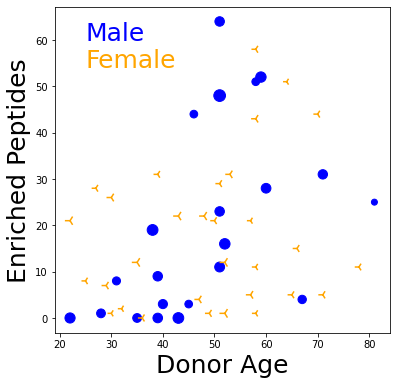

In [35]:
mD = pd.read_csv("metadata.tsv", sep="\t", header=0)

fig, ax = plt.subplots(1,1,figsize=(6,6))

mD_male = mD[mD["Sex"]=="M"]
mD_female = mD[mD["Sex"]=="F"]

colors = ["blue" if x=="M" else "orange" for x in mD["Sex"]]
ax.scatter(mD_male["Age"], mD_male["SARS2Peps"], c="blue", s=mD_male["ControlPeps"], marker="o", label="Male")
ax.scatter(mD_female["Age"], mD_female["SARS2Peps"], c="orange", s=mD_female["ControlPeps"], marker="3", label="Female")
ax.set_xlabel("Donor Age", fontsize=25)
ax.set_ylabel("Enriched Peptides", fontsize=25)

#leg = ax.legend(loc="upper left", fontsize=15)

ax.text(25,60, "Male", fontsize=25, color="blue")
ax.text(25,54, "Female", fontsize=25, color="orange")

Text(0, 0.5, 'Enriched Peptides')

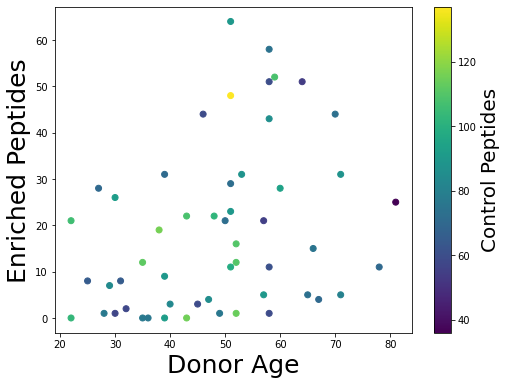

In [52]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
sp = ax.scatter(mD["Age"], mD["SARS2Peps"], c=mD["ControlPeps"], cmap="viridis")

cbar = fig.colorbar(sp)
cbar.set_label("Control Peptides", fontsize=20)

ax.set_xlabel("Donor Age", fontsize=25)
ax.set_ylabel("Enriched Peptides", fontsize=25)


# Boxplot with Seaborn

Text(0.5, 0, 'Sex')

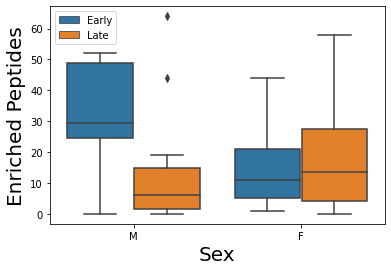

In [66]:
fig, ax1 = plt.subplots(1,1,figsize=(6,4))
boolTime = ["Early" if x else "Late" for x in  mD["Days from PCR diagnosis"]<=25]

sns.boxplot(x="Sex", y="SARS2Peps", hue=boolTime, data=mD, ax=ax1)
ax1.set_ylabel("Enriched Peptides", fontsize=20)
ax1.set_xlabel("Sex", fontsize=20)



# Heat map

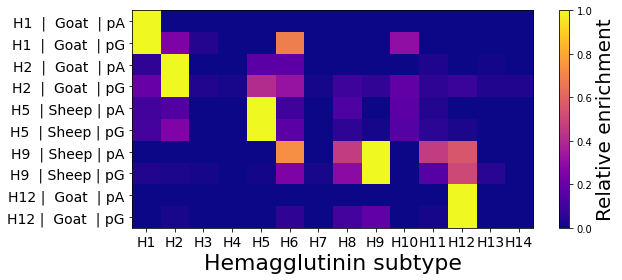

In [102]:
allDF = pd.read_csv("heatmap_data.tsv", sep="\t", header=0)

dataDF = allDF[allDF.columns[4:]]

fig_hm, ax_hm = plt.subplots(1,1,figsize=(9,4), facecolor="white")

im = ax_hm.imshow(dataDF, cmap="plasma", aspect="auto")

# Generate color bar
cbar = fig.colorbar(im)
cbar.set_label('Relative enrichment', fontsize=20)

# Set x-axis label
ax_hm.set_xlabel("Hemagglutinin subtype", fontsize=22)

# Set x-axis ticks
ax_hm.set_xticks(range(14))
ax_hm.set_xticklabels(dataDF.columns, fontsize=14)

# Set y-axis tick
yLabels = []
for index, row in allDF.iterrows():
    if len(row["HAtype"])==2:
        if len(row["Host"])==4:
            yLabels.append(f'{row["HAtype"]}  |  {row["Host"]}  | {row["CaptureProtein"]}')
        else:
            yLabels.append(f'{row["HAtype"]}  | {row["Host"]} | {row["CaptureProtein"]}')
            
    else:
        if len(row["Host"])==4:
            yLabels.append(f'{row["HAtype"]} |  {row["Host"]}  | {row["CaptureProtein"]}')
        else:
            yLabels.append(f'{row["HAtype"]} | {row["Host"]} | {row["CaptureProtein"]}')
ax_hm.set_yticks(range(10))
ax_hm.set_yticklabels(yLabels, fontsize=14)

fig_hm.savefig("FluA-HA_heatmap.png", dpi=300, bbox_inches="tight")


# Drawing a map

In [119]:
# Read in district polygons
json=pd.read_json("SLE_v3.geojson") ## load data

# Read in points representing "centers" of districts, provided as lat and lon
df = pd.read_csv('SLE_district_centroids.txt', index_col=0, sep="\t", header=None, names = ["Longitude", "Latitude"])

In [120]:
df

,Longitude,Latitude
Kailahun,-10.645754,8.129091
Kenema,-11.165743,7.896995
Kono,-10.866380,8.683284
Bombali,-12.203870,9.293726
Koinadugu,-11.302096,9.329804
Tonkolili,-11.700000,8.750000
Bo,-11.737349,7.920407
WesternUrban,-13.266764,8.466012
Kambia,-13.080380,9.002102
Pujehun,-11.500000,7.300000


(-13.7, -10.0, 6.6, 10.2)

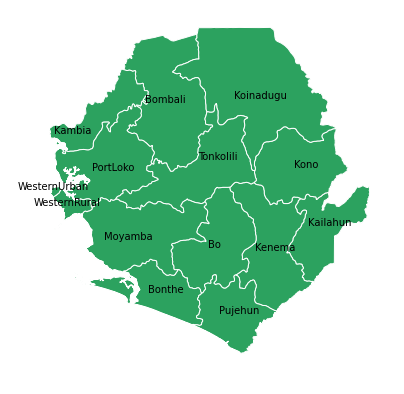

In [122]:
fig, ax = plt.subplots(1,1,figsize=(7,7))

for loc in json['features']:
    pc = np.array(loc['geometry']['coordinates'], dtype=object)
    
    location = loc['properties']['location']
    
    if loc['geometry']['type']=='Polygon': ## location is single part
        for coords in pc:
            poly=plt.Polygon(coords,facecolor='#2ca25f',edgecolor='white')
            ax.add_patch(poly)

    elif loc['geometry']['type']=='MultiPolygon': ## multiple parts detected
        for part in pc:
            for coords in part:
                poly=plt.Polygon(coords,facecolor='#2ca25f',edgecolor='white')
                ax.add_patch(poly)

    # Add location label
    ax.text(df["Longitude"][location], df["Latitude"][location], location, ha='center')
    
            
# Need to change axes limits to see polygons
ax.set_ylim([6.6,10.2])
ax.set_xlim([-13.7,-10])

# Hide axes
plt.axis('off')
